# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime


Bad key "text.kerning_factor" on line 4 in
d:\Users\SAC\.conda\envs\datascience\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
#Carga de los datos
data_2019 = pd.read_csv('Datasets/flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('Datasets/flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('Datasets/flujo-vehicular-2017.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


periodo       fecha  hora_inicio  hora_fin     dia    estacion    sentido  \
0     2019  2019-01-01            0         1  Martes     Alberti     Centro   
1     2019  2019-01-01            0         1  Martes     Alberti     Centro   
2     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
3     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
4     2019  2019-01-01            0         1  Martes  Avellaneda     Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              22  
1       Liviano    TELEPASE               6  
2       Liviano  NO COBRADO              53  
3       Liviano    TELEPASE              18  
4       Liviano    EFECTIVO              16

In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


periodo       fecha  hora_inicio  hora_fin    dia estacion sentido  \
0     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
1     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
2     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
3     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
4     2018  2018-01-01            2         3  Lunes  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              29  
1       Liviano    TELEPASE               9  
2       Liviano  NO COBRADO              73  
3       Liviano    TELEPASE              39  
4       Liviano  NO COBRADO             115

In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
1     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
2     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
3     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
4     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              25  
1       Liviano    TELEPASE               7  
2       Liviano  NO COBRADO               5  
3       Liviano    EFECTIVO               2  
4       Liviano    EFECTIVO              94

Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [6]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [7]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [8]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [9]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.("TARJETA DE DISCAPACIDAD" varia el nombre con los años)

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [10]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2017, data_2018, data_2019])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_fin','forma_pago', 'estacion'], inplace = True)# se hizo un pequeño ajuste en hora_inicio por hora_fin

dataset.head()

fecha  hora_inicio      dia sentido tipo_vehiculo  cantidad_pasos
1750  2017-01-01            0  Domingo  Centro       Liviano               1
1755  2017-01-01            1  Domingo  Centro       Liviano              10
1757  2017-01-01            1  Domingo  Centro       Liviano             783
1761  2017-01-01            1  Domingo  Centro        Pesado               3
1764  2017-01-01            2  Domingo  Centro       Liviano              14

In [11]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_inicio como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_inicio, unit = 'h')

#Quitamos las columnas fecha y hora_inicio ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_inicio'], inplace = True)

dataset.head()

dia sentido tipo_vehiculo  cantidad_pasos              fecha2
1750  Domingo  Centro       Liviano               1 2017-01-01 00:00:00
1755  Domingo  Centro       Liviano              10 2017-01-01 01:00:00
1757  Domingo  Centro       Liviano             783 2017-01-01 01:00:00
1761  Domingo  Centro        Pesado               3 2017-01-01 01:00:00
1764  Domingo  Centro       Liviano              14 2017-01-01 02:00:00

In [12]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

dia sentido tipo_vehiculo  cantidad_pasos               fecha
1750  Domingo  Centro       Liviano               1 2017-01-01 00:00:00
1755  Domingo  Centro       Liviano              10 2017-01-01 01:00:00
1757  Domingo  Centro       Liviano             783 2017-01-01 01:00:00
1761  Domingo  Centro        Pesado               3 2017-01-01 01:00:00
1764  Domingo  Centro       Liviano              14 2017-01-01 02:00:00

In [13]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset.head(-1)

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
0       Domingo     Centro       Liviano               1 2017-01-01 00:00:00
1       Domingo  Provincia        Pesado               5 2017-01-01 01:00:00
2       Domingo  Provincia       Liviano             561 2017-01-01 01:00:00
3       Domingo  Provincia       Liviano              12 2017-01-01 01:00:00
4       Domingo     Centro       Liviano             783 2017-01-01 01:00:00
...         ...        ...           ...             ...                 ...
238863   Martes  Provincia       Liviano             556 2019-12-31 21:00:00
238864   Martes     Centro       Liviano             580 2019-12-31 21:00:00
238865   Martes  Provincia        Pesado               1 2019-12-31 21:00:00
238866   Martes  Provincia       Liviano             190 2019-12-31 22:00:00
238867   Martes     Centro       Liviano             214 2019-12-31 22:00:00

[238868 rows x 5 columns]

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238869 entries, 0 to 238868
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   dia             238869 non-null  object        
 1   sentido         238869 non-null  object        
 2   tipo_vehiculo   238869 non-null  object        
 3   cantidad_pasos  238869 non-null  int64         
 4   fecha           238869 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 9.1+ MB


Al parecer hay mas de 8 registros por hora en promedio (238869/(24*365*3)=

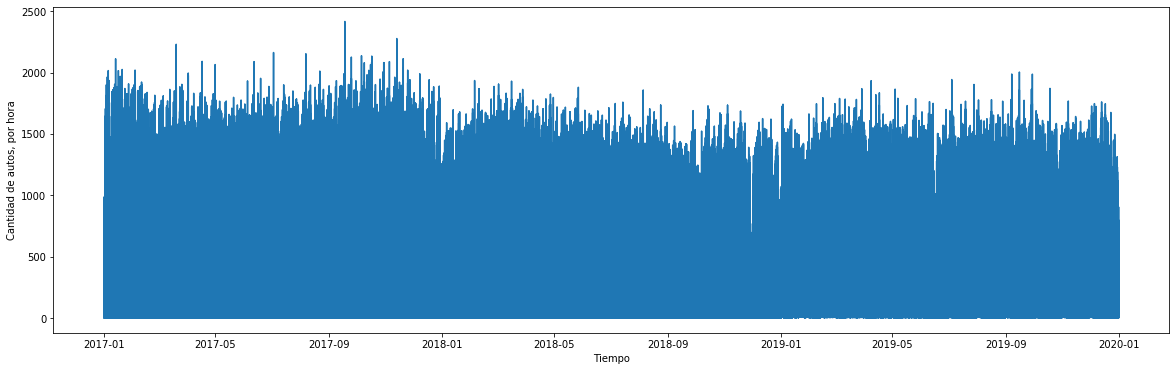

In [15]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (20,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

## Analisis exploratorio de datos

Se resamplean los datos por ventanas de tiempo comunes

In [16]:
horario = dataset.resample('h', on = 'fecha').sum()
print(horario.shape)
horario.head(3)

(26280, 1)


cantidad_pasos
fecha                              
2017-01-01 00:00:00               1
2017-01-01 01:00:00            1374
2017-01-01 02:00:00            1734

In [17]:
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head(3)

(1095, 1)


cantidad_pasos
fecha                     
2017-01-01           31183
2017-01-02           51568
2017-01-03           51093

In [18]:
semanal = dataset.resample('W', on = 'fecha').sum()
print(semanal.shape)
semanal.head(3)

(158, 1)


cantidad_pasos
fecha                     
2017-01-01           31183
2017-01-08          347212
2017-01-15          366413

In [19]:
mensual = dataset.resample('M', on = 'fecha',  label='left', loffset='24h').sum()
print (mensual.shape)
mensual.head()

(36, 1)


cantidad_pasos
fecha                     
2017-01-01         1565260
2017-02-01         1363113
2017-03-01         1451214
2017-04-01         1373985
2017-05-01         1407136

In [20]:
anual = dataset.resample('Y', on = 'fecha',kind = 'timestamp').sum()
print (anual.shape)
anual.head()

(3, 1)


cantidad_pasos
fecha                     
2017-12-31        17783512
2018-12-31        15966944
2019-12-31        14115125

Veamos que nos muestran nuestros datos ahora

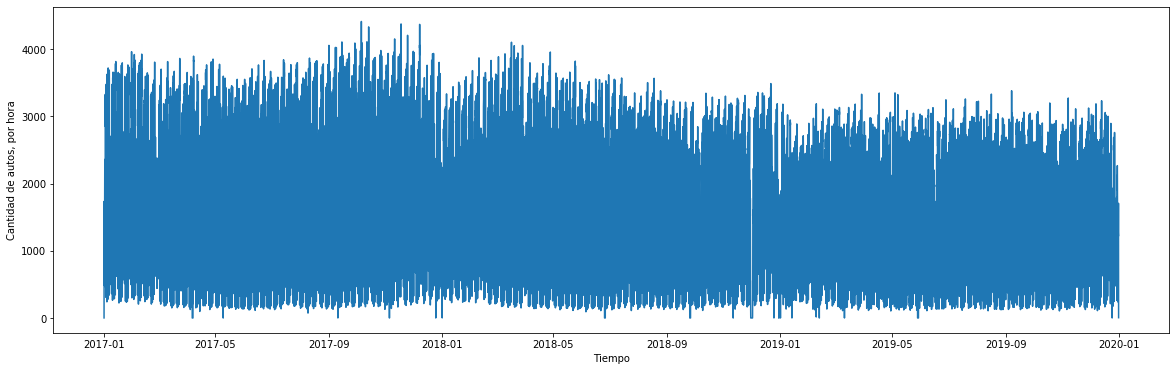

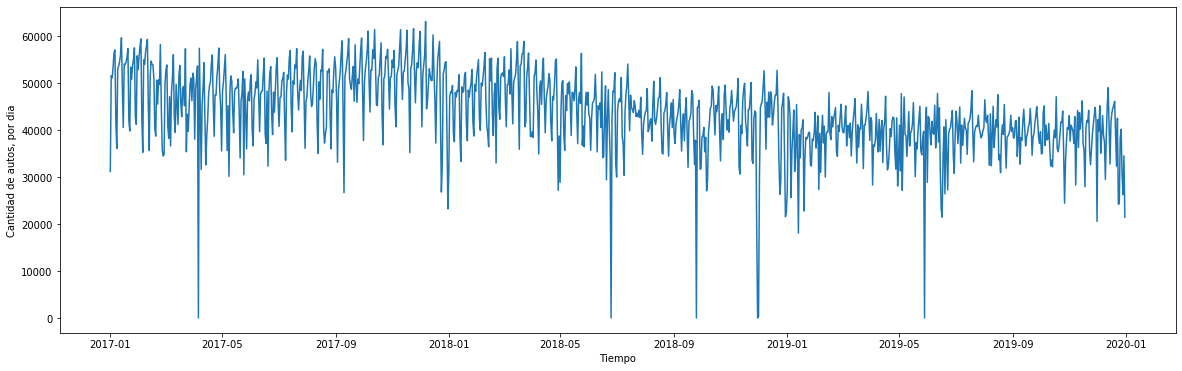

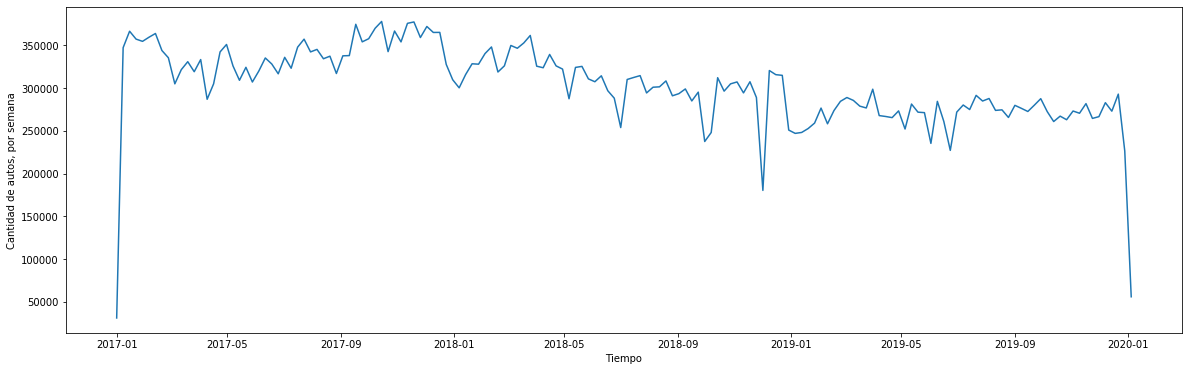

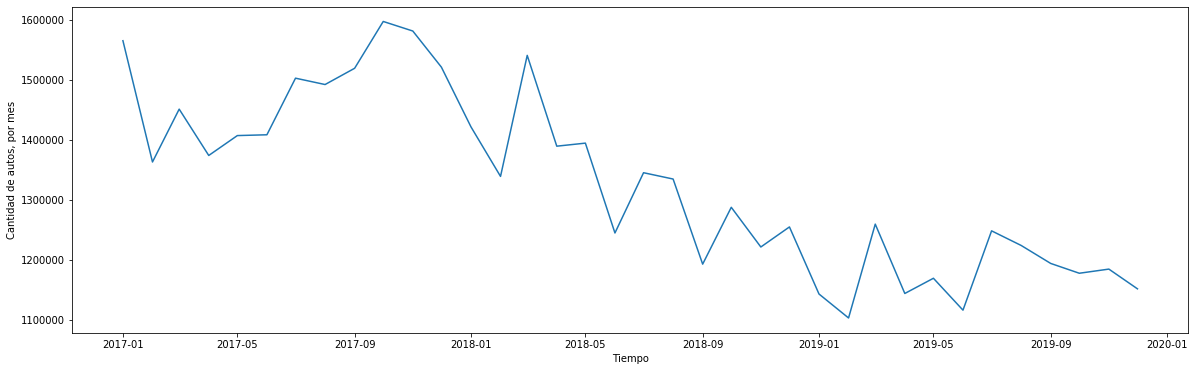

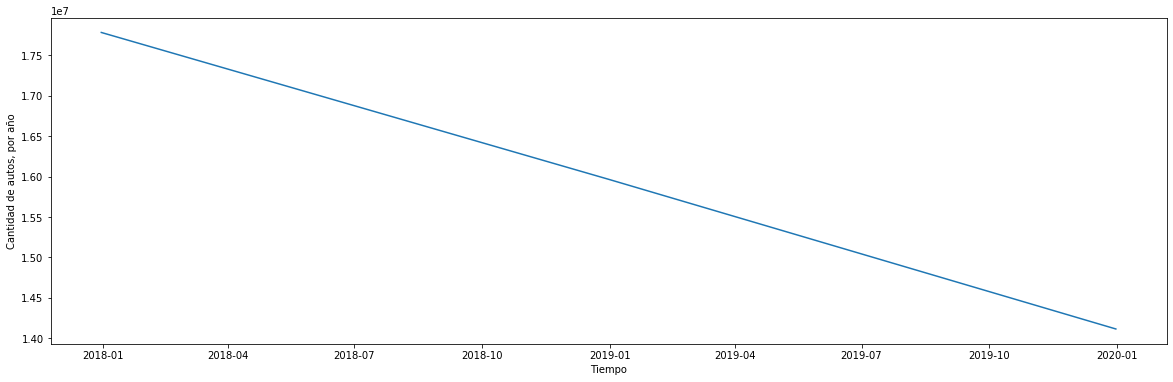

In [21]:
plt.figure(figsize = (20,6))
plt.plot(horario.index, horario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
#plt.xlim(736330,736654)
plt.show()

plt.figure(figsize = (20,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

plt.figure(figsize = (20,6))
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por semana')
plt.show()

plt.figure(figsize = (20,6))
plt.plot(mensual.index, mensual.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por mes')
plt.show()

plt.figure(figsize = (20,6))
plt.plot(anual.index, anual.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por año')
plt.show()

En la horaria, vemos que hay una dispercion de los datos muy grande, con valores cercanos a 0 y hasta mas de 4000</br>
En la diaria, alcanzamos a ver datos extraños en 5 dias que analizare puntualmente.</br>
En la semanal, se ven ciertos patrones que se tendran que analizar.</br>
En la mensual, se identifica 3 patrones semejantes por año, se alcanza a observar tendencia hacia la baja.</br>
De la grafica anual nos muestra una clara tendencia descendente muy lineal , durante este periodo de 3 años.</br>

Ahora voy a tomar una ventana de tiempo de 28 dias o 4 semanas para tener otro panorama en las graficas por hora y por dia

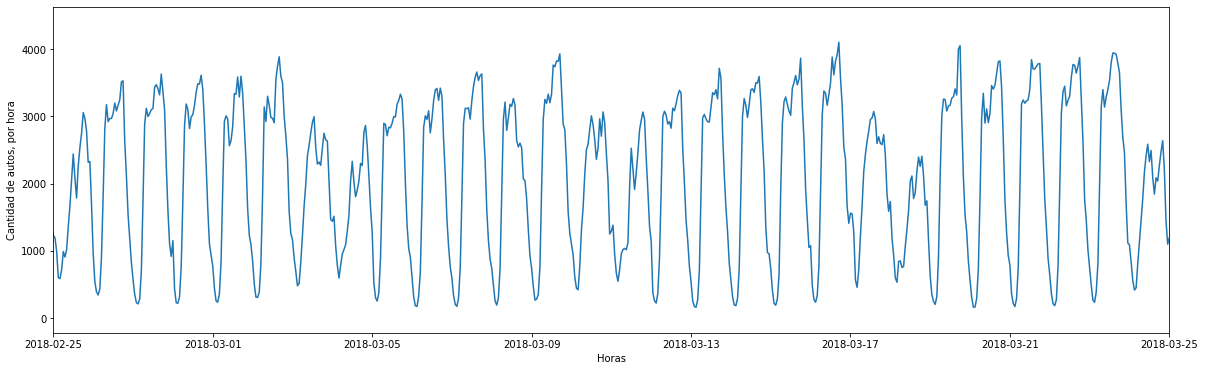

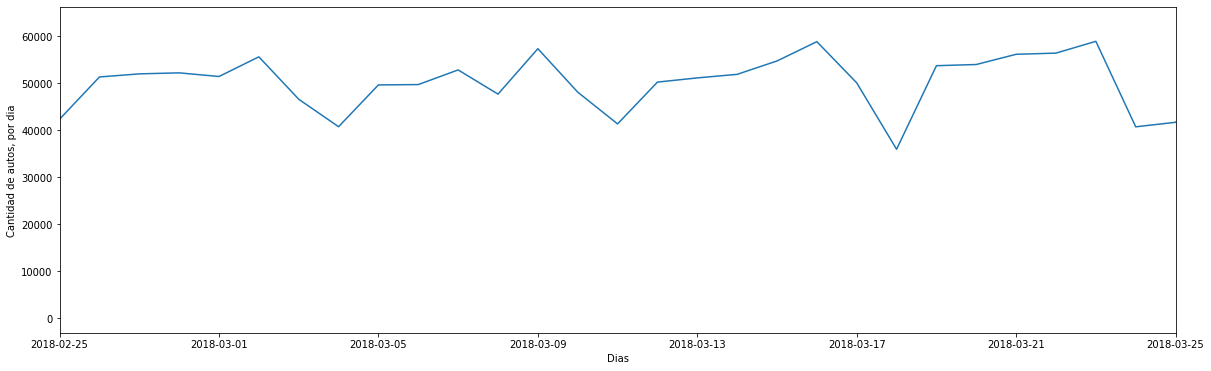

In [22]:
p0 = 736750
p1 = 736778

plt.figure(figsize = (20,6))
plt.plot(horario.index, horario.cantidad_pasos)
plt.xlabel('Horas')
plt.ylabel('Cantidad de autos, por hora')
plt.xlim(p0,p1)
plt.show()

plt.figure(figsize = (20,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Dias')
plt.ylabel('Cantidad de autos, por dia')
plt.xlim(p0,p1)
plt.show()

En la horaria se ven comportamientos repetitivos diarios, con un descenso cada fin de semana.</br>
La diaria, tambien muestra un comportamiento semanal repetitivo y aparte hace notar  que hay una cresta los viernes y valle los domingos.</br>
Tomare una muestra de un dia al azar para ver el comportamiento del trafico por hora.

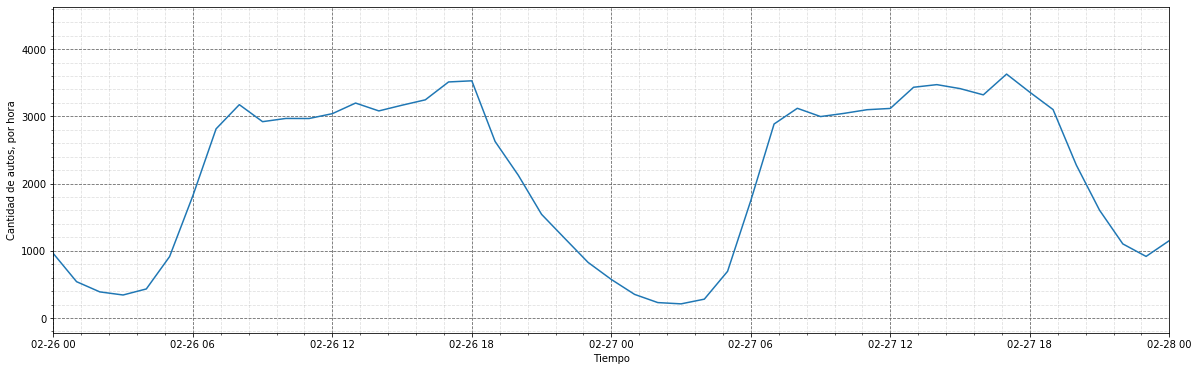

In [23]:
p0 = 736751
p1 = 736753

plt.figure(figsize = (20,6))
plt.plot(horario.index, horario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.xlim(p0,p1)
plt.grid(b=True, which='major', color='#666666', linestyle='--')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='--', alpha=0.3)
plt.show()

Tomando una muestra de tres dias se observa que hay un minimo de 3 a 4 de mañana, y hay pico local a las 13hrs, y otro mayor entre 17Hrs y 18Hrs.</br> Pero vamos confirmandolo con las graficas de los datos descriptivos.

In [24]:
horal_hora=horario.groupby(lambda x: x.hour)['cantidad_pasos'].agg(['sum', 'mean', 'max','min','std'])
horal_hora.transpose()

0              1              2              3   \
sum   879116.000000  614594.000000  429898.000000  334860.000000   
mean     802.845662     561.273059     392.600913     305.808219   
max     1948.000000    1848.000000    1916.000000    1525.000000   
min        0.000000       0.000000       0.000000       0.000000   
std      307.589566     317.681845     276.873615     181.006120   

                 4              5             6             7             8   \
sum   411330.000000  781617.000000  1.564013e+06  2.276977e+06  2.476701e+06   
mean     375.643836     713.805479  1.428322e+03  2.079431e+03  2.261827e+03   
max     1107.000000    1536.000000  2.306000e+03  3.467000e+03  3.837000e+03   
min        0.000000       0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
std      128.981267     157.294405  4.341878e+02  8.073564e+02  8.457224e+02   

                9   ...            14            15            16  \
sum   2.471790e+06  ...  2.933388e+06  2.969568e+06  2.993721e+06   
mean  2.257342e+03  ...  2.678893e+03  2.711934e+03  2.733992e+03   
max   3.776000e+03  ...  4.331000e+03  4.369000e+03  4.113000e+03   
min   0.000000e+00  ...  0.000000e+00  0.000000e+00  0.000000e+00   
std   7.274583e+02  ...  6.873616e+02  6.930141e+02  6.096534e+02   

                17            18            19            20            21  \
sum   3.115036e+06  3.071455e+06  2.661885e+06  2.339949e+06  1.875810e+06   
mean  2.844782e+03  2.804982e+03  2.430945e+03  2.136940e+03  1.713068e+03   
max   4.412000e+03  4.078000e+03  3.515000e+03  3.515000e+03  3.071000e+03   
min   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
std   6.193929e+02  5.792260e+02  4.472256e+02  4.477917e+02  4.198271e+02   

                22            23  
sum   1.412685e+06  1.057141e+06  
mean  1.290123e+03  9.654256e+02  
max   2.827000e+03  1.912000e+03  
min   0.000000e+00  0.000000e+00  
std   3.287029e+02  2.874218e+02  

[5 rows x 24 columns]

In [25]:
horal_diasemana=horario.groupby(lambda x: x.dayofweek)['cantidad_pasos'].agg(['sum', 'mean', 'max','min','std'])
horal_diasemana.transpose()

0             1             2             3             4  \
sum   6.691387e+06  6.865551e+06  7.125526e+06  7.302169e+06  7.647272e+06   
mean  1.775846e+03  1.822068e+03  1.903185e+03  1.950366e+03  2.042541e+03   
max   4.052000e+03  3.890000e+03  4.109000e+03  4.412000e+03  4.375000e+03   
min   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
std   1.014615e+03  1.089240e+03  1.110810e+03  1.133874e+03  1.136771e+03   

                 5             6  
sum   6.441715e+06  5.791961e+06  
mean  1.720544e+03  1.537145e+03  
max   3.465000e+03  3.740000e+03  
min   0.000000e+00  0.000000e+00  
std   8.253239e+02  7.671401e+02

In [26]:
horal_mes = horario.groupby(lambda x: x.month)['cantidad_pasos'].agg(['sum', 'mean', 'max','min','std']) 
horal_mes.transpose()

1             2             3             4             5   \
sum   4.129950e+06  3.805285e+06  4.251579e+06  3.907378e+06  3.970958e+06   
mean  1.850336e+03  1.887542e+03  1.904829e+03  1.808971e+03  1.779103e+03   
max   3.962000e+03  3.926000e+03  4.103000e+03  3.957000e+03  3.822000e+03   
min   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
std   1.011418e+03  1.014626e+03  1.055046e+03  1.042248e+03  1.040708e+03   

                6             7             8             9             10  \
sum   3.769350e+06  4.096365e+06  4.050919e+06  3.906155e+06  4.062584e+06   
mean  1.745069e+03  1.835289e+03  1.814928e+03  1.808405e+03  1.820154e+03   
max   3.832000e+03  3.842000e+03  4.056000e+03  4.107000e+03  4.412000e+03   
min   0.000000e+00  1.100000e+02  7.300000e+01  0.000000e+00  1.050000e+02   
std   1.037791e+03  1.034537e+03  1.032636e+03  1.043065e+03  1.030998e+03   

                11            12  
sum   3.987393e+06  3.927665e+06  
mean  1.846015e+03  1.759707e+03  
max   4.375000e+03  4.369000e+03  
min   0.000000e+00  0.000000e+00  
std   1.051238e+03  9.812980e+02

In [27]:
horal_anio = horario.groupby(lambda x: x.year)['cantidad_pasos'].agg(['sum', 'mean', 'max','min','std']) 
horal_anio.transpose()

2017          2018          2019
sum   1.778351e+07  1.596694e+07  1.411512e+07
mean  2.030081e+03  1.822711e+03  1.611316e+03
max   4.412000e+03  4.103000e+03  3.381000e+03
min   0.000000e+00  0.000000e+00  0.000000e+00
std   1.135332e+03  1.019540e+03  8.836386e+02

Se grafica el promedio por hora , agrupado por hora, dia de la semana, mes, y año

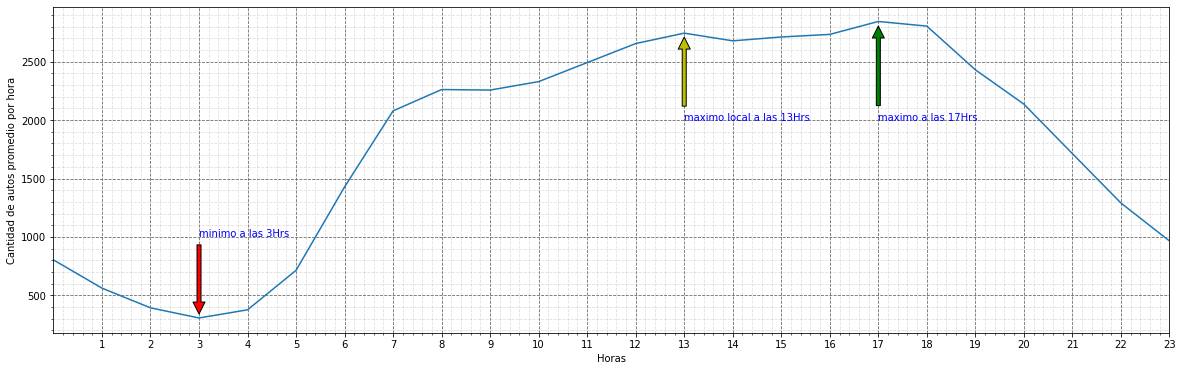

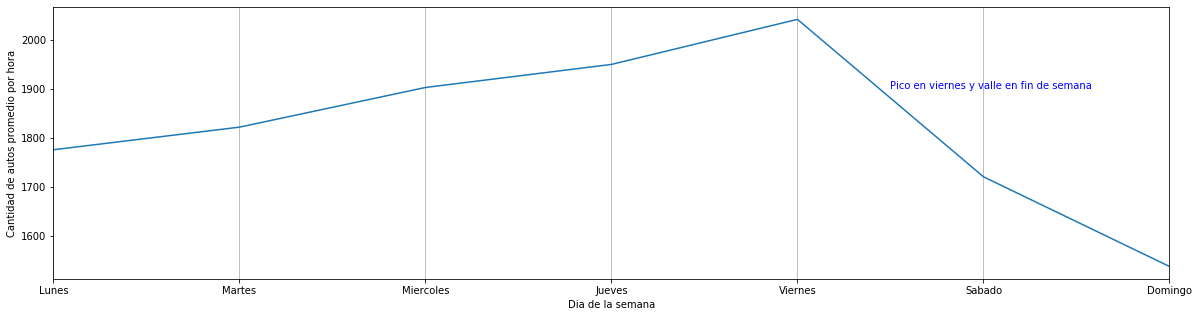

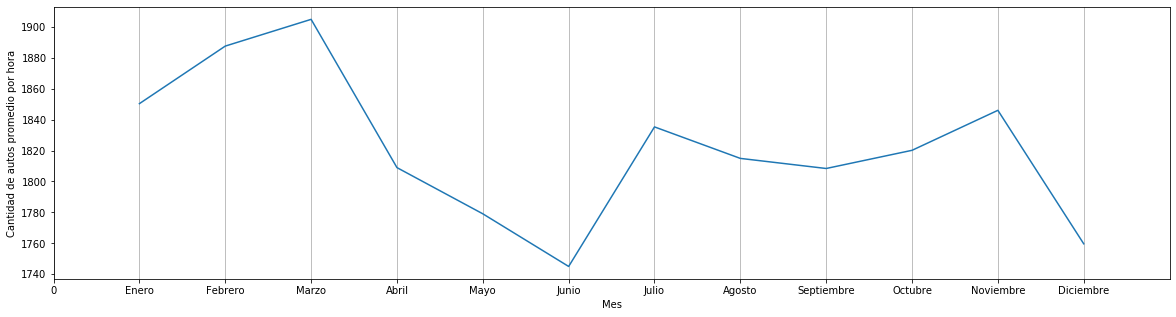

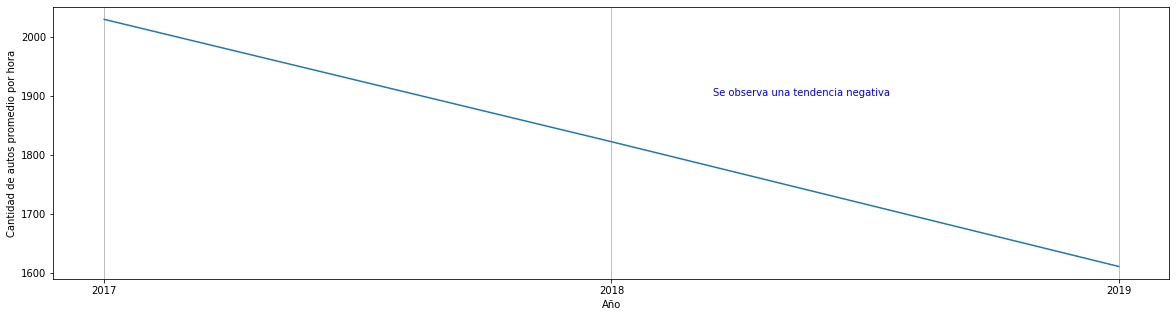

In [28]:
plt.figure(figsize = (20,6))
plt.plot(horal_hora.index, horal_hora['mean'])
plt.xlabel('Horas')
plt.ylabel('Cantidad de autos promedio por hora')
plt.annotate('minimo a las 3Hrs', c='b', xy=(3, horal_hora['mean'].min()), xytext=(3, 1000),arrowprops=dict(facecolor='r', shrink=0.05),)
plt.annotate('maximo a las 17Hrs', c='b', xy=(17, horal_hora['mean'].max()), xytext=(17, 2000),arrowprops=dict(facecolor='g', shrink=0.05),)         
plt.annotate('maximo local a las 13Hrs', c='b', xy=(13, horal_hora['mean'][13]), xytext=(13, 2000),arrowprops=dict(facecolor='y', shrink=0.05),)
plt.xlim(0,23)
plt.grid(b=True, which='major', color='#666666', linestyle='--')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='--', alpha=0.3)
plt.xticks(np.arange(1, 24, step=1))
plt.show()

plt.figure(figsize = (20,5))
plt.plot(horal_diasemana.index, horal_diasemana['mean'])
plt.xlabel('Dia de la semana')
plt.ylabel('Cantidad de autos promedio por hora')
#plt.axis([0,23,0,3000])
plt.text(4.5,1900 , r'Pico en viernes y valle en fin de semana',c='b')
#plt.annotate('minimo a las 3Hrs', xy=(3, horal_hora['mean'].min()), xytext=(3, 1000),arrowprops=dict(facecolor='black', shrink=0.05),)
#plt.annotate('maximo a las 17Hrs', xy=(17, horal_hora['mean'].max()), xytext=(17, 2000),arrowprops=dict(facecolor='black', shrink=0.05),)         
#plt.annotate('maximo local a las 13Hrs', xy=(13, horal_hora['mean'][13]), xytext=(13, 2000),arrowprops=dict(facecolor='black', shrink=0.05),)
plt.xticks(np.arange(7), ('Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo'))
plt.xlim(0,6)
plt.grid(axis='x')
plt.show()

plt.figure(figsize = (20,5))
plt.plot(horal_mes.index, horal_mes['mean'])
plt.xlabel('Mes')
plt.ylabel('Cantidad de autos promedio por hora')
plt.xlim(1,13)
plt.xticks(np.arange(13), (0,'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre','Diciembre'))
plt.grid(axis='x')
plt.show()

plt.figure(figsize = (20,5))
plt.plot(horal_anio.index, horal_anio['mean'])
plt.xlabel('Año')
plt.ylabel('Cantidad de autos promedio por hora')
plt.text(2018.2,1900 , 'Se observa una tendencia negativa',c='b')
plt.xticks(np.arange(2017, 2020, step=1))
plt.grid(axis='x')
plt.show()

Me surgio una duda en el mes de Febrero a partir de los graficos asi que graficare el promedio por mes agrupado por mes, y el promedio por mes de los 3 años.

In [29]:
mensual_mes=mensual.groupby(lambda x: x.month)['cantidad_pasos'].agg(['sum', 'mean', 'max','min','std'])
mensual_mes.transpose()

1             2             3             4             5   \
sum   4.129950e+06  3.805285e+06  4.251579e+06  3.907378e+06  3.970958e+06   
mean  1.376650e+06  1.268428e+06  1.417193e+06  1.302459e+06  1.323653e+06   
max   1.565260e+06  1.363113e+06  1.540839e+06  1.389468e+06  1.407136e+06   
min   1.143023e+06  1.103086e+06  1.259526e+06  1.143925e+06  1.169278e+06   
std   2.146880e+05  1.436937e+05  1.437092e+05  1.375128e+05  1.338406e+05   

                6             7             8             9             10  \
sum   3.769350e+06  4.096365e+06  4.050919e+06  3.906155e+06  4.062584e+06   
mean  1.256450e+06  1.365455e+06  1.350306e+06  1.302052e+06  1.354195e+06   
max   1.408464e+06  1.502820e+06  1.492232e+06  1.519327e+06  1.597356e+06   
min   1.116120e+06  1.248324e+06  1.223990e+06  1.192827e+06  1.177647e+06   
std   1.465218e+05  1.284489e+05  1.348005e+05  1.881669e+05  2.176395e+05   

                11            12  
sum   3.987393e+06  3.927665e+06  
mean  1.329131e+06  1.309222e+06  
max   1.581428e+06  1.521177e+06  
min   1.184560e+06  1.151645e+06  
std   2.192709e+05  1.906732e+05

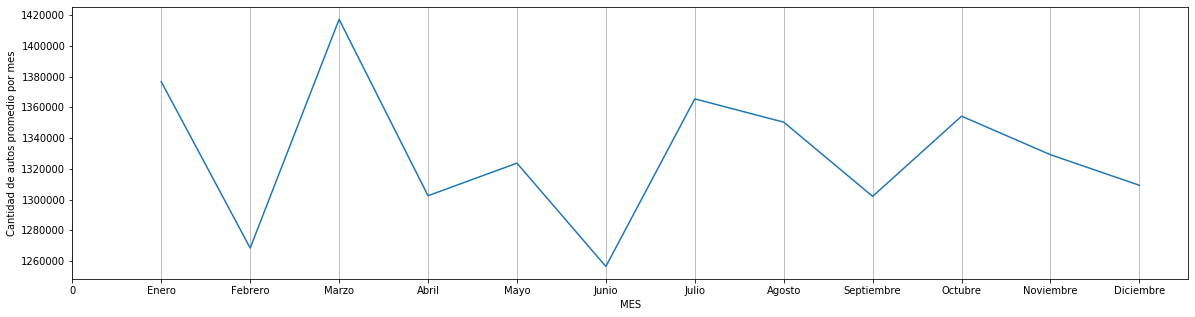

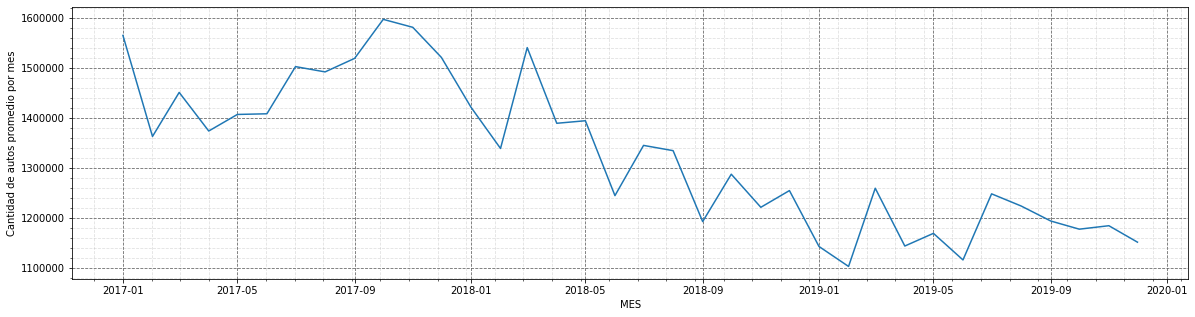

In [30]:
plt.figure(figsize = (20,5))
plt.plot(mensual_mes.index, mensual_mes['mean'])
plt.xlabel('MES')
plt.ylabel('Cantidad de autos promedio por mes')
plt.grid(axis='x')
plt.xticks(np.arange(13), (0,'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre','Diciembre'))
plt.show()

plt.figure(figsize = (20,5))
plt.plot(mensual.index, mensual['cantidad_pasos'])
plt.xlabel('MES')
plt.ylabel('Cantidad de autos promedio por mes')
#plt.grid(axis='x')
plt.grid(b=True, which='major', color='#666666', linestyle='--')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='--', alpha=0.3)
plt.show()

Aclarando mi duda que tengo con el mes de Febrero, es un poco engañoso que en la grafica que muestra cantidad de autos promedio agrupado por mes muestra un incremento con respecto a Enero , y al mostrar los autos promedio por mes Febrero este mas abajo que Enero de su respectivo año.</br>
Esto se explica por que al tener menos dias el mes de Febrero al tenermenos dias, tuvo un total de menos carros para sacar el promedio mensual; sin embargo el promedio por hora fue mas grande que en Enero.

In [31]:
diario.describe().transpose()

count          mean          std  min      25%      50%  \
cantidad_pasos  1095.0  43712.859361  8192.736927  0.0  39061.5  43761.0   

                    75%      max  
cantidad_pasos  49498.0  63127.0

In [32]:
semanal.describe().transpose()

count          mean           std      min        25%  \
cantidad_pasos  158.0  302946.71519  47342.854449  31183.0  276345.25   

                     50%       75%       max  
cantidad_pasos  307094.0  334921.5  377832.0

In [33]:
mensual.describe().transpose()

count          mean            std        min        25%  \
cantidad_pasos   36.0  1.329599e+06  147828.079619  1103086.0  1193707.5   

                      50%         75%        max  
cantidad_pasos  1336891.5  1429053.75  1597356.0

In [34]:
anual.describe().transpose()

count          mean           std         min         25%  \
cantidad_pasos    3.0  1.595519e+07  1.834222e+06  14115125.0  15041034.5   

                       50%         75%         max  
cantidad_pasos  15966944.0  16875228.0  17783512.0

#### Correcion de datos
Defino una clase para calcular IQR y localizar outliers

In [35]:
class IQR:
    def __init__(self,f):
        self.q75 = np.nanpercentile(f, 75)
        self.q25 = np.nanpercentile(f, 25)
        self.iqr = self.q75 - self.q25
        self.outliermaxL = self.q25 + (1.5*self.iqr)        
        self.outlierminL = self.q25 - (1.5*self.iqr)
        self.outliermaxX = self.q25 + (3 *self.iqr)
        self.outlierminX = self.q25 - (3 *self.iqr)

In [36]:
IQRdiario = IQR(diario.cantidad_pasos)

In [37]:
print ('Maximo extremo =',IQRdiario.outliermaxX,', Maximo normal =',IQRdiario.outliermaxL,', Minimo Normal =',IQRdiario.outlierminL,', Minimo extremo =',IQRdiario.outlierminX)

Maximo extremo = 70371.0 , Maximo normal = 54716.25 , Minimo Normal = 23406.75 , Minimo extremo = 7752.0


In [38]:
print (diario.loc[(diario.cantidad_pasos>IQRdiario.outliermaxX)].shape)
print (diario.loc[(diario.cantidad_pasos>IQRdiario.outliermaxL)].shape)
print (diario.loc[(diario.cantidad_pasos<IQRdiario.outlierminL)].shape)
print (diario.loc[(diario.cantidad_pasos<IQRdiario.outlierminX)].shape)

(0, 1)
(87, 1)
(16, 1)
(6, 1)


Son muy pocos lo que hay de outliers extremos, solo 6  en la parte baja, tomara unos minutos analizarlos uno a uno.

In [39]:
diario.loc[(diario.cantidad_pasos<=IQRdiario.outlierminX)]

cantidad_pasos
fecha                     
2017-04-06              40
2018-06-25               0
2018-09-25               0
2018-11-30               0
2018-12-01             350
2019-05-29               0

##### Se investigo motivos para tener tan poco flujo registrado de vehiculos las fechas identificadas, Buscando un poco, se encontro que coinciden con dias de paro Nacional y una cumbre. En el caso de la Cumbre se cerro el trafico y los dias de paro no hubo quien cobrara.

Paro 6 de abril 2017
https://www.lanacion.com.ar/politica/paro-del-6-de-abril-general-cgt-servicios-nid2005425/</br>
Paro 25 de Junio 2018
https://www.frba.utn.edu.ar/comunicado-institucional-sobre-el-paro-nacional-del-25-de-junio/</br>
Paro 25 de Septiembre 2018
https://www.cronista.com/economia-politica/Lunes-24-y-martes-25-todos-los-cortes-las-marchas-y-el-operativo-del-Gobierno-20180923-0026.html</br>
Cumbre 30 de Noviembre 2018 abre hasta 22 hrs de 1 de diciembre
https://www.buenosaires.gob.ar/jefedegobierno/xiii-cumbre-lideres-g20/cumbre-del-g20-viernes-30-de-noviembre</br>
Paro 29 de Mayo 2019
https://www.minutouno.com/notas/5034092-paro-general-del-29-mayo-la-cgt-todos-los-servicios-afectados

Como no son fechas recurrentes las sustituire con una iterpolacion para el diario; y en horario, con un registro de 7 dias despues.</br>
No usare fillna porque me dejaria los dias faltantes de forma lineal, al igual que pasaria con interpolacion. Tengo que traer los datos de una semana antes o despues para no afectar los comportamientos semanales, como si pasaria me trajera valores de un dia antes o despues.

In [40]:
print(horario.isna().sum())
print('Registros con "0" ',(horario.cantidad_pasos==0).sum())

cantidad_pasos    0
dtype: int64
Registros con "0"  178


In [41]:
#Hago dos series(tipo str y tipo datetime) para hacer los pasos siguientes
outlier = diario.loc[(diario.cantidad_pasos<=IQRdiario.outlierminX)].index.strftime('%Y-%m-%d' )
outlierdt = diario.loc[(diario.cantidad_pasos<=IQRdiario.outlierminX)].index
print(outlier)
print(outlierdt.day_name())

Index(['2017-04-06', '2018-06-25', '2018-09-25', '2018-11-30', '2018-12-01',
       '2019-05-29'],
      dtype='object', name='fecha')
Index(['Thursday', 'Monday', 'Tuesday', 'Friday', 'Saturday', 'Wednesday'], dtype='object', name='fecha')


In [42]:
horario.loc[(outlier[0])].head(2)

cantidad_pasos
fecha                              
2017-04-06 00:00:00              40
2017-04-06 01:00:00               0

In [43]:
#inputador adaptado
n,i,N,M=0,0,6,24
#print(n,i,N,M)
for n in range (N):
    for i in range (M):
        #if horario.loc[(outlierdt[n])+ datetime.timedelta(hours = i)].cantidad_pasos == 0: #para decidir si todo el dia o solo las horas con 0
            horario.loc[(outlierdt[n])+ datetime.timedelta(hours = i)].cantidad_pasos = horario.loc[(outlierdt[n])+ datetime.timedelta(days =7,hours = i)].cantidad_pasos

In [44]:
horario.loc[(outlier[0])].head(4)

cantidad_pasos
fecha                              
2017-04-06 00:00:00            1005
2017-04-06 01:00:00             819
2017-04-06 02:00:00             489
2017-04-06 03:00:00             459

In [45]:
print(horario.isna().sum())
print('Registros con "0" ',(horario.cantidad_pasos==0).sum())

cantidad_pasos    0
dtype: int64
Registros con "0"  37


##### Ahora a sustituir los outlier para la serie por dia.

In [46]:
diario.cantidad_pasos[diario.cantidad_pasos <IQRdiario.outlierminX] = np.nan
print(diario.isna().sum())

cantidad_pasos    6
dtype: int64


In [47]:
diario = diario.interpolate()
print(diario.isna().sum())

cantidad_pasos    0
dtype: int64


In [48]:
print(diario.loc[outlier[0]])

cantidad_pasos    55537.0
Name: 2017-04-06 00:00:00, dtype: float64


#### Identificacion del comportamiento y separacion de componentes de la serie

In [49]:
from statsmodels.tsa.stattools import acf

Text(0.5, 0, 'lag por horas')

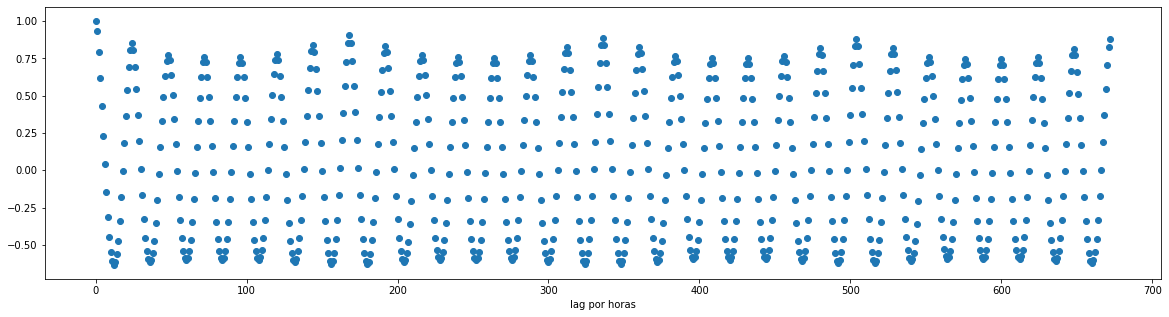

In [50]:
nlags = 24*28
autocorr = acf(horario.cantidad_pasos, nlags = nlags, fft=False)
plt.figure(figsize = (20,5))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag por horas')

See muestra correlacion a 24 hrs y correlacion negativa a 12 hrs, y se vuelve mas grande cada septimo dia.

Text(0.5, 0, 'lag por dias')

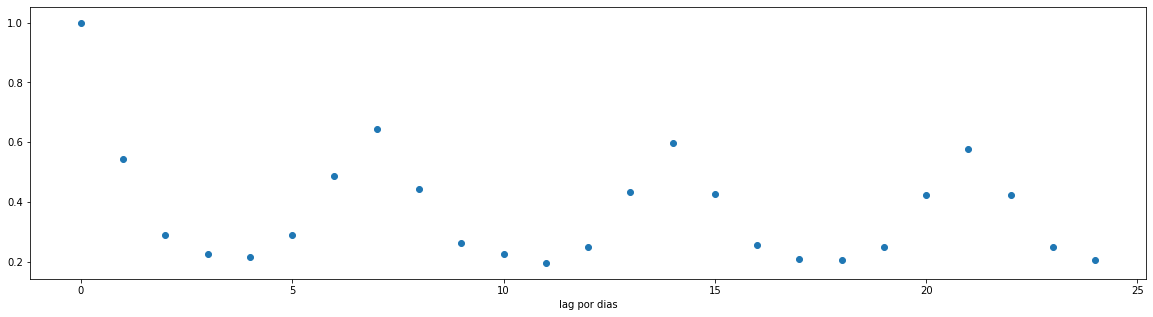

In [51]:
nlags = 12*2
autocorr_d = acf(diario.cantidad_pasos, nlags = nlags,fft=False)
plt.figure(figsize = (20,5))
plt.scatter(np.arange(nlags+1), autocorr_d)
plt.xlabel('lag por dias')

Se confirma lo que se habia observado anteriormente, se tiene una fuerte autocorrelacion a retrasos de 7 dias. Lo que nos dice que tambien tiene componente (AR)

Text(0.5, 0, 'lag por semanas')

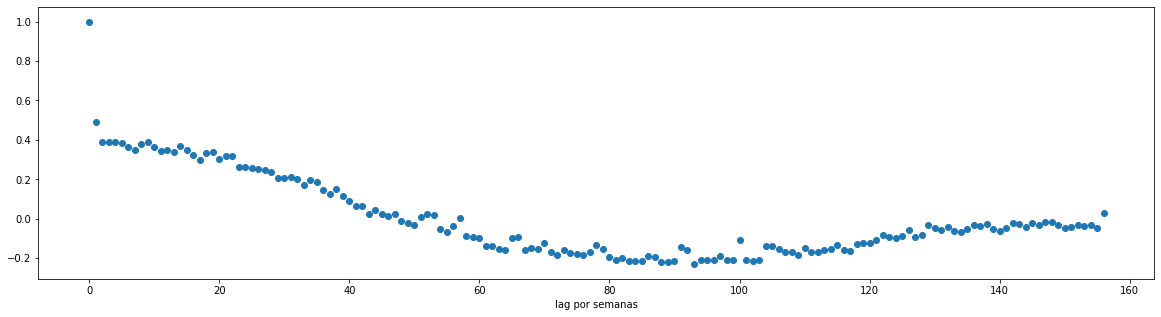

In [52]:
nlags = 52*3
autocorr_s = acf(semanal.cantidad_pasos, nlags = nlags,fft=False)
plt.figure(figsize = (20,5))
plt.scatter(np.arange(nlags+1), autocorr_s)
plt.xlabel('lag por semanas')

No hay una autocorrelacion fuerte entre semanas a lo largo de los 3 años, los que nos indica componentes de media movil(MA)

Text(0.5, 0, 'lag por meses')

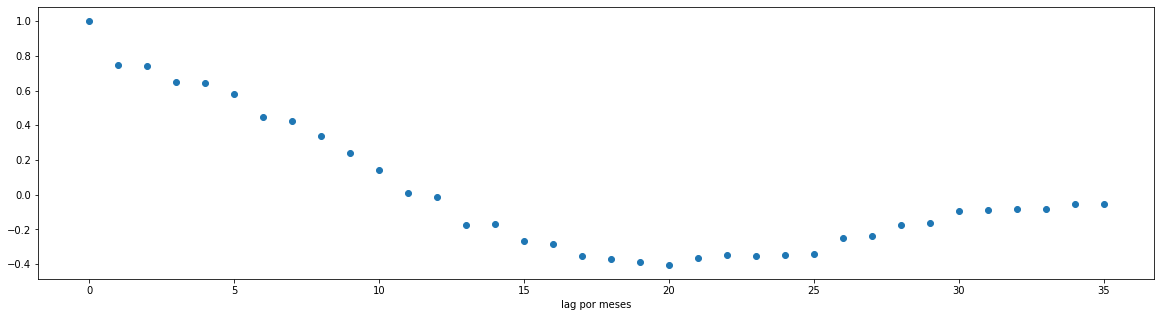

In [53]:
nlags = 12*3-1
autocorr_m = acf(mensual.cantidad_pasos, nlags = nlags,fft=False)
plt.figure(figsize = (20,5))
plt.scatter(np.arange(nlags+1), autocorr_m)
plt.xlabel('lag por meses')

En este caso esperaba una autocorrelacion mayor al retraso 12, pero no fue asi.

In [54]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

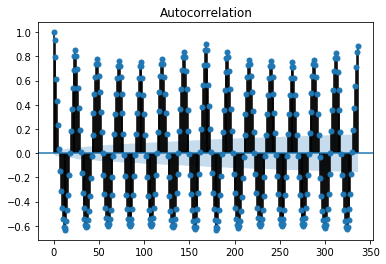

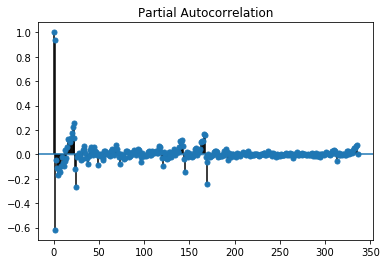

In [55]:
plot_acf(horario.cantidad_pasos, lags = 24*14)# 2 semanas
plt.show()

plot_pacf(horario.cantidad_pasos, lags = 24*14)
plt.show()

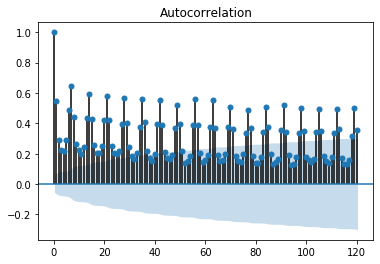

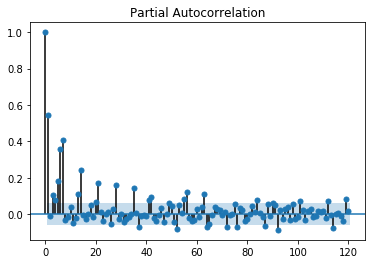

In [56]:
plot_acf(diario.cantidad_pasos, lags = 30*4)
plt.show()

plot_pacf(diario.cantidad_pasos, lags = 30*4)
plt.show()

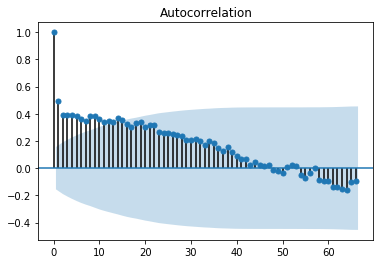

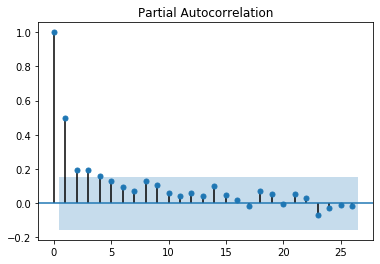

In [57]:
plot_acf(semanal.cantidad_pasos, lags = 66)
plt.show()

plot_pacf(semanal.cantidad_pasos, lags = 26)
plt.show()

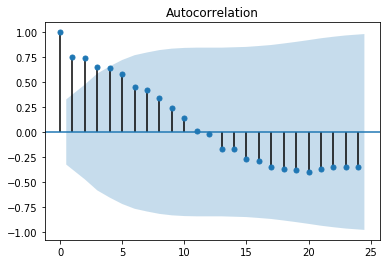

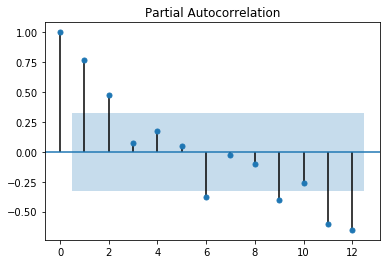

In [58]:
plot_acf(mensual.cantidad_pasos, lags = 24)
plt.show()

plot_pacf(mensual.cantidad_pasos, lags = 12)
plt.show()

Con las graficas ACF y PACF se puede definir que se tienen componente AR y MA, la Semanal es mas parecida a un modelo ARMA, pero no lo logra.</br>

Se podria concluir que al menos se necesita una diferenciacion, para ajustarla a un modelo tradicional, y al menos seria ARIMA, ya que contiene componentes de media movil (MA) y los de Autocorrelacion(AR).

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1440x360 with 0 Axes>

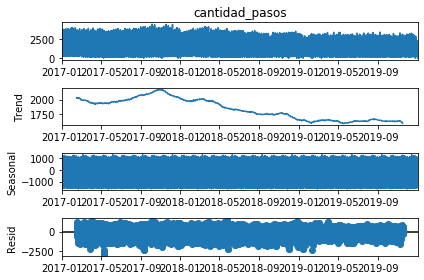

In [60]:
result = seasonal_decompose(horario.cantidad_pasos, period=24*92, model='additive')# 24 * 92 es igual a un trimestre, para la tendencia
plt.figure(figsize = (20,5))
result.plot()
plt.show()

<Figure size 1440x288 with 0 Axes>

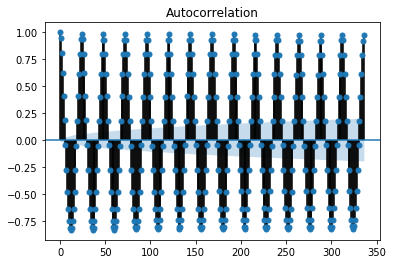

In [61]:
#Graficas ACFy PACF sin tendencia
plt.figure(figsize = (20,4))
plot_acf(result.seasonal, lags = 24*14)
plt.show()

Quitando el componente de tendencia, ahora se observa que la autocorrelacion es muy fuerte cada 24 horas

Otra forma de comprobar que se necesita una diferenciacion es viendo un histograma de residuos.

d:\Users\SAC\.conda\envs\datascience\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
d:\Users\SAC\.conda\envs\datascience\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


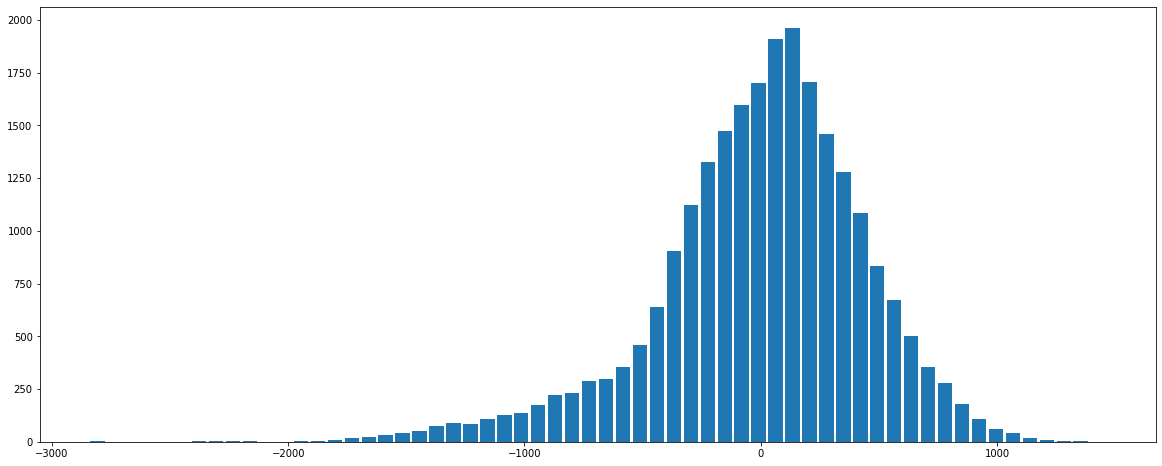

In [62]:
#Resid histograma
plt.figure(figsize = (20,8))
plt.hist(result.resid, rwidth=.85, bins = 60)
plt.show()

Como el histograma de residuos no es una clara campana normal, se dice que la serie hay que diferenciarla, como se muestra a continuacion y volver a ver el ACF y PACF.</br>

Se nota tendencia a la baja, recordemos que es solo para los que usan pago en efectivo. Probemos un ajuste lineal

In [63]:
horario['fecha_numeros']=horario.index.map(datetime.datetime.toordinal)
horario.head(2)

cantidad_pasos  fecha_numeros
fecha                                             
2017-01-01 00:00:00               1         736330
2017-01-01 01:00:00            1374         736330

In [64]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(horario.fecha_numeros.values.reshape(-1, 1), horario.cantidad_pasos)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
ventana = int(730)# un mes
horario_promedio_tendencia = horario.cantidad_pasos.rolling(window=ventana, center = True).mean()
#diario_promedio_tendencia

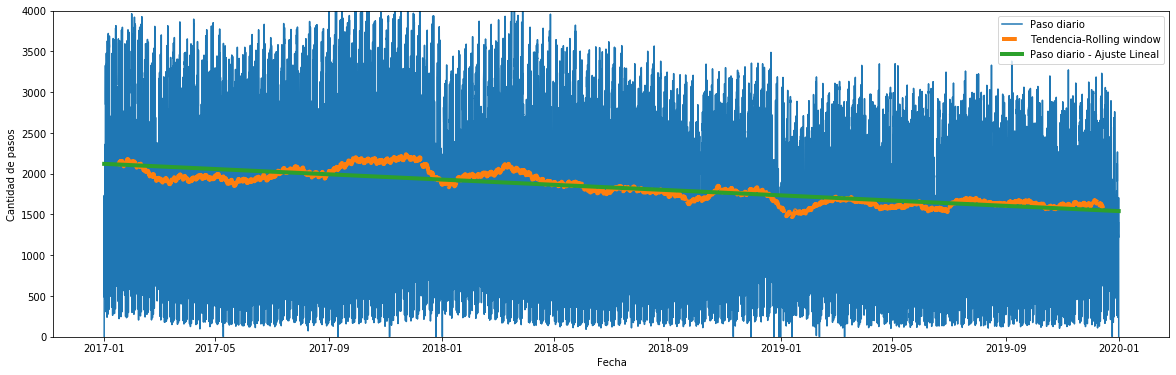

In [66]:
plt.figure(figsize = (20,6))
plt.plot(horario.index, horario.cantidad_pasos, label = 'Paso diario')
plt.plot(horario_promedio_tendencia, ls = '--', lw = 4, label = 'Tendencia-Rolling window')
plt.plot(horario.index, lr.predict(horario.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Paso diario - Ajuste Lineal')
#plt.xlim(datetime.date(2018,1,1), datetime.date(2019,1,1))
plt.ylim([0,4000])
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

El ajuste lineal nos da una idea de como es la tendencia a la baja con vehiculos que pagan en efectivo, incluso en los maximos por año se nota en el 2017 maximos de 4000 pasos y para el 2019 maximos de 3000, tambien Se nota que el periodo de septiembre a Diciembre del 2017 la media esta por encima de esta tendencia.Tambien se encuentra datos por debajo de la tendencia en princiopios del 2019.

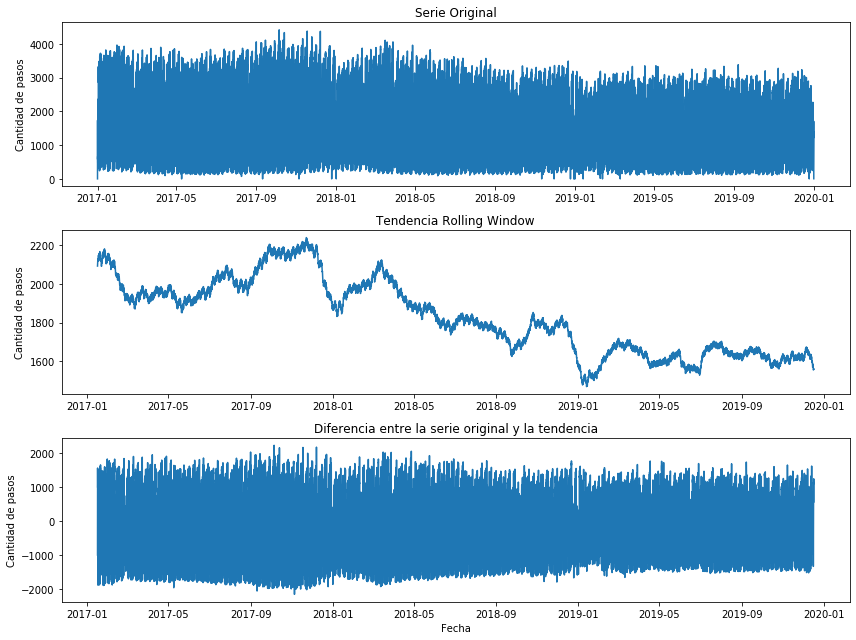

In [67]:
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original')
plt.plot(horario.index, horario.cantidad_pasos)
plt.ylabel('Cantidad de pasos')

plt.subplot(3,1,2)
plt.title('Tendencia Rolling Window')
plt.plot(horario_promedio_tendencia)
plt.ylabel('Cantidad de pasos')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia')
plt.plot(horario.index, horario.cantidad_pasos - horario_promedio_tendencia)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')

plt.tight_layout()
plt.show()


### One-Step Prediction

In [68]:
# Convertir a pandas.core.series.Series
senial = horario.cantidad_pasos
senial.head()

fecha
2017-01-01 00:00:00       1
2017-01-01 01:00:00    1374
2017-01-01 02:00:00    1734
2017-01-01 03:00:00    1247
2017-01-01 04:00:00     579
Freq: H, Name: cantidad_pasos, dtype: int64

In [69]:
# se define el periodo de busqueda
look_back = 7*24 #en periodos de 7 dias obtengo mejores modelos,  35 y 91 tienen scores similares, pero aumenta el tiempo de modelado bastante
senial.shape[0]

26280

In [70]:
# Se modela matrix de features X y vector objetivo y
N = senial.shape[0]
X = np.zeros((N - look_back - 1,look_back))#numpy.ndarray
y = np.zeros(N - look_back - 1)#numpy.ndarray
print(X.shape, y.shape)

(26111, 168) (26111,)


In [71]:
# Se sustituyen los ceros de 'X' y 'y'
for i in range(X.shape[0]):
     #X[i,:] = senial.values.iloc[i:i+look_back]
     #y[i] = senial.values.iloc[i+look_back]
    X[i,:] = senial.iloc[i:i+look_back]#Cada Renglon de 'X' son las features para 'y' correpondiente
    y[i] = senial.iloc[i+look_back]

In [72]:
print(X.shape)

(26111, 168)


In [73]:
print(y.shape)

(26111,)


In [74]:
N_train = 24*11*91 - look_back # cantidad de instancias que vamos a usar para entrenar(24 horas/dia  11 trimestres 91 dias/trimestre. 
N_test = 24*92 # cantidad de puntos que vamos a usar para evaluar(24 hrs/dia 92 dias/trimestres 1 trimestre)
N_total = N_train + N_test # total de train y test

length_total = N_train + N_test + look_back
# Se divide los datos de entrenamiento y test
X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(23856, 168) (23856,)
(2208, 168) (2208,)


In [75]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
#from sklearn.linear_model import LinearRegression
#from sklearn.neighbors import KNeighborsRegressor
import time

In [76]:
# PARA LA ALARMA
#import winsound
#duration = 2000  # milisegundos
#freq = 980  # Hz

In [77]:
s = time.time()
# Modelo prdictor
rf = RandomForestRegressor(n_estimators=100, random_state=13, n_jobs = -1).fit(X_train,y_train)
e = time.time()
print('Tiempo de proceso =',(e - s)/60)

Tiempo de proceso = 3.1780135790507


In [78]:
#winsound.Beep(freq, duration)

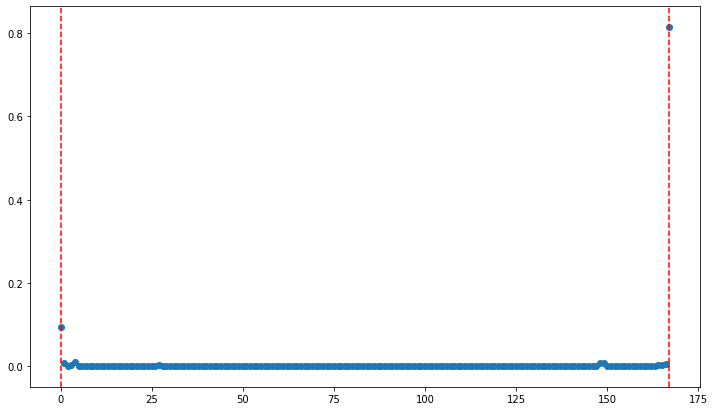

In [79]:
#Importancia de features, es la que corresponde al retraso de una semana
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
for x in np.arange(2)*(look_back-1):
     plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

Por la importancia de la feature se observa que le da mucha importancia al retraso 168, que corresponde a una semana atras y la misma hora. entonces, cuando lo hice por mas multiplos de semana tambie pasos asi.

In [80]:
# Probar modelo
#y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

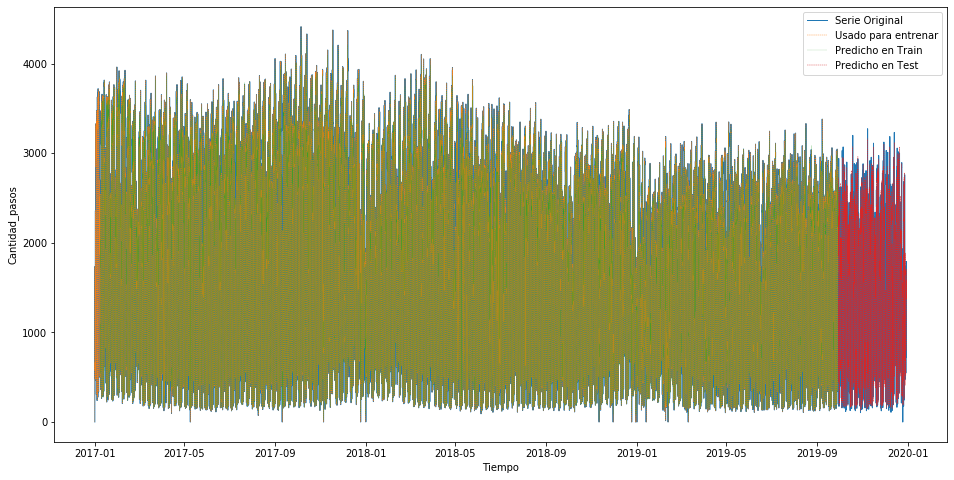

In [81]:
# Grafica completa
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 1, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back], '--', lw=0.4, alpha= .95, label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'--', lw=0.2, alpha= .95, label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'--', lw=0.4, label = 'Predicho en Test')
plt.legend()
#plt.xlim(737400,737424)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad_pasos')
plt.show()

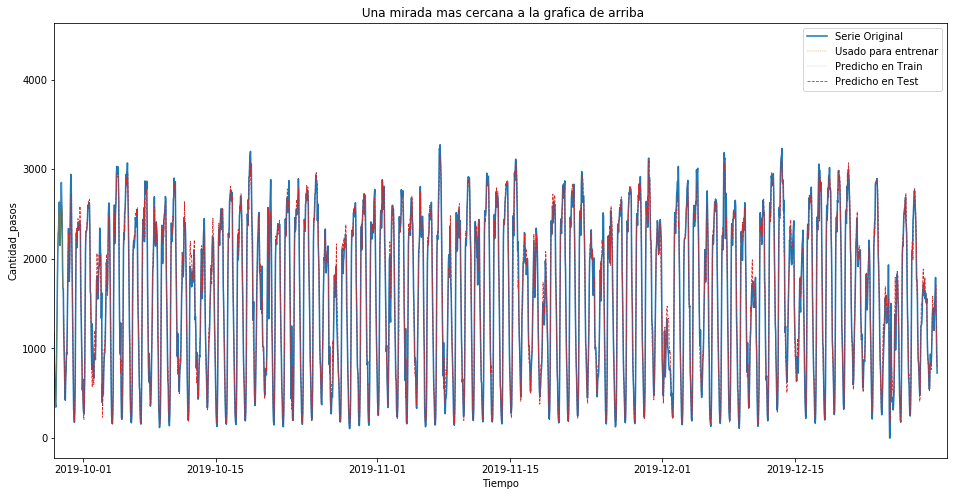

In [82]:
# Grafica con acercamiento
plt.figure(figsize=(16,8))
plt.title(' Una mirada mas cercana a la grafica de arriba')
plt.plot(senial.index[:length_total], senial[:length_total],lw = 1.55, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back], '--', lw=0.4, alpha= .95, label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'--', lw=0.2, alpha= .95, label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'--', lw=0.8, label = 'Predicho en Test')
plt.legend()
plt.xlim(737330,737424)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad_pasos')
plt.show()

El modelo en test se ve muy bien muy acertado, solo faltaria con datos desconocidos

Se toma RMSE para medir error, ya que mide los errores que se generan entre lo predicho y lo que originalmente era y el resultado esta en las misma unidades

In [83]:
RMSE = mean_squared_error(y_train, y_train_pred,squared=False)
print('Error en Train RMSE:',(RMSE))

RMSE = mean_squared_error(y_test, y_test_pred,squared=False)
print('Error en Test RMSE:',(RMSE))

# con Estimadores = 100
#Error en Train: 65.03344361668361 con look back 24 * 7 2.5min
#Error en Test: 155.89577394184144
#Error en Train: 65.02260087060796 con look back 24 *14 5.3min
#Error en Test: 157.9188657866169
#Error en Train: 64.95229937950907 con look back 24*21 8min
#Error en Test: 159.34261972272088
#Error en Train: 65.7663853309889 con look back 24 *28 9min
#Error en Test: 156.88917551881272
#Error en Train: 65.67851214343833 con look back 24 *35 12min
#Error en Test: 155.3462333731774
#Error en Train: 65.36900194316917 con look back 24 *42 14.6min
#Error en Test: 157.23147442040622
#Error en Train: 65.11592903234524 con look back 91 *24 28min
#Error en Test: 155.74483303840688
#Error en Train: 65.91506591772205 con look back 119*24 36min
#Error en Test: 157.01360286874598

Error en Train RMSE: 65.03344361668361
Error en Test RMSE: 155.89577394184144


En train el nivel de error es muy bueno, considerando que su desviacion estandar es de 1000 aprox. </br>
Y el nivel de error en test tambien es aceptable.

In [84]:
# Definir un vector para benchmark prediciendo con el valor anterior
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

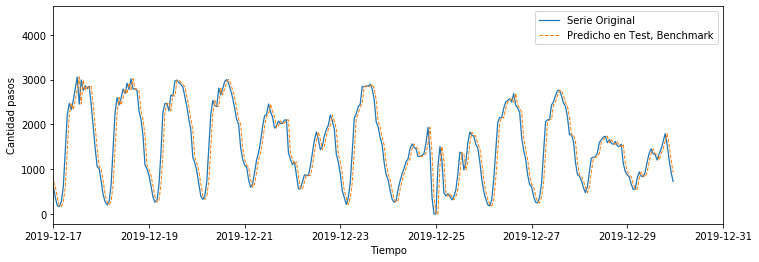

In [85]:
plt.figure(figsize=(12,4))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 1.25, label = 'Serie Original')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred_benchmark,'--', lw = 1, label = 'Predicho en Test, Benchmark')
plt.xlim(senial.index[N_train+look_back], senial.index[length_total])
plt.xlim(737410,737424)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad pasos')
plt.legend()
plt.show()

In [86]:
MSE = mean_squared_error(y_test, y_test_pred_benchmark,squared=False)
print('Error en Test RMSE:',(MSE))

Error en Test RMSE: 308.98816578342104


El nivel de error en benchmark es el doble que el obtenido por el modelo

Multi-Step Prediction

In [87]:
#rf = RandomForestRegressor(n_estimators= 100, random_state=13, n_jobs = -1,).fit(X_train,y_train)
y_ms_test_pred = []
x = X_test[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_test.size):
    y_os_pred = rf.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

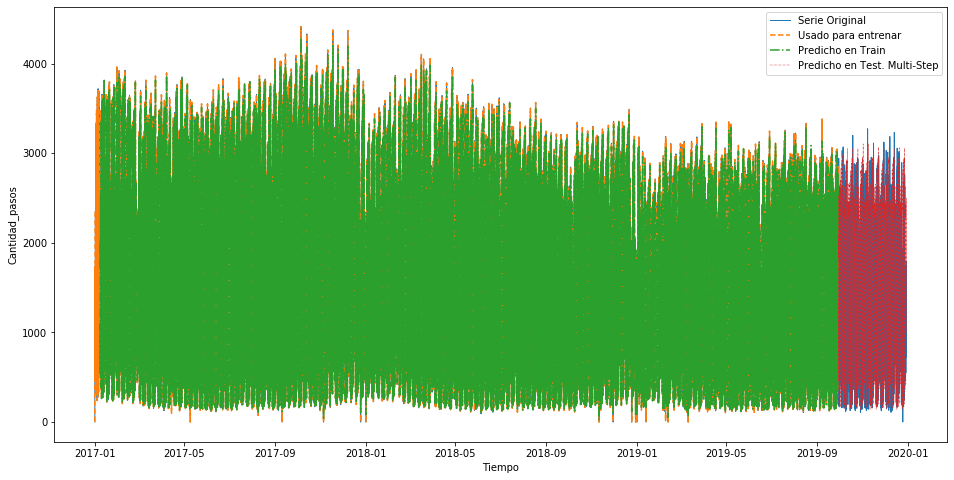

In [88]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 1, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_ms_test_pred,'-.', lw = .4, label = 'Predicho en Test. Multi-Step')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad_pasos')
plt.show()

In [89]:
RMSE = mean_squared_error(y_train, y_train_pred,squared=False)
print('Error en Train RMSE:',(RMSE))
RMSE = mean_squared_error(y_test, y_ms_test_pred)
print('Error en Test RMSE:',np.sqrt(RMSE))
# Error en Test: 409.7836164453933 con lb 24*7 E=100
# Error en Test: 409.6960837965327 con lb 24*14 E=100
# Error en Test: 410.8176294349772 con lb 24*21 E=100
# Error en Test: 412.0528523237121 con lb 24*28 E=100

Error en Train RMSE: 65.03344361668361
Error en Test RMSE: 409.7836164453933


El error aumento mas que el punto de benchmark, por lo tanto no es un buen procedimiento el multistep  para esta serie

In [90]:
#winsound.Beep(freq, duration)

### Prediccion 2020

In [91]:
# Crear un dataset vacío para 2020
df = pd.DataFrame(index=pd.date_range(start='1/1/2020', end='31/12/2020', freq='H'))
df['cantidad_pasos'] = 0
df.head()

cantidad_pasos
2020-01-01 00:00:00               0
2020-01-01 01:00:00               0
2020-01-01 02:00:00               0
2020-01-01 03:00:00               0
2020-01-01 04:00:00               0

In [92]:
# Concatenar al dataset utilizado para entrenar
#horario.drop(columns=['fecha_numeros'], inplace = True)
horario_concat=pd.concat([horario,df], ignore_index=False)

In [93]:
# Crear nuevamente el set para la predicción
senial_2020 = horario_concat.cantidad_pasos
senial_2020.head(-1)

2017-01-01 00:00:00       1
2017-01-01 01:00:00    1374
2017-01-01 02:00:00    1734
2017-01-01 03:00:00    1247
2017-01-01 04:00:00     579
                       ... 
2020-12-30 19:00:00       0
2020-12-30 20:00:00       0
2020-12-30 21:00:00       0
2020-12-30 22:00:00       0
2020-12-30 23:00:00       0
Freq: H, Name: cantidad_pasos, Length: 35040, dtype: int64

In [94]:
### Generar las matrices vacías, X con la misma cantidad de columnas que uso el modelo
N_2020 = senial_2020.shape[0]
X_2020 = np.zeros((N_2020 - look_back - 1,look_back))
y_2020 = np.zeros(N_2020 - look_back - 1)
print(X_2020.shape, y_2020.shape)

(34872, 168) (34872,)


In [95]:
for i in range(X.shape[0]):
     #X[i,:] = senial.values.iloc[i:i+look_back]
     #y[i] = senial.values.iloc[i+look_back]
    X_2020[i,:] = X[i,:]#Cada Renglon de 'X' son las features para 'y' correpondiente
    y_2020[i] = y[i]


In [96]:
# Creamos el set de train y de test
N_train_2020 = horario.shape[0] -1 - look_back 
#N_train_2020 = horario.shape[0]-200
print (N_train_2020)
N_test_2020 = 373*24
#N_test_2020 = 366*24 
print (N_test_2020)
N_total_2020 = N_train_2020 + N_test_2020
#print (N_total_2020)

length_total_2020 = N_train_2020 + N_test_2020 + look_back

26111
8952


In [97]:
#X_train_2020 = X_2020[:N_train_2020,:]
#y_train_2020 = y_2020[:N_train_2020]
#print(X_train_2020.shape, y_train_2020.shape)

X_test_2020 = X_2020[N_train_2020:N_train_2020+N_test_2020,:]
y_test_2020 = y_2020[N_train_2020:N_train_2020+N_test_2020]
print(X_test_2020.shape, y_test_2020.shape)

(8761, 168) (8761,)


In [98]:
y_test_pred_2020 = []
x = X_2020[26105,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_test_2020.size):
    y_os_pred = rf.predict(x.reshape(1,-1))
    y_test_pred_2020.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_test_pred_2020 = np.array(y_test_pred_2020)

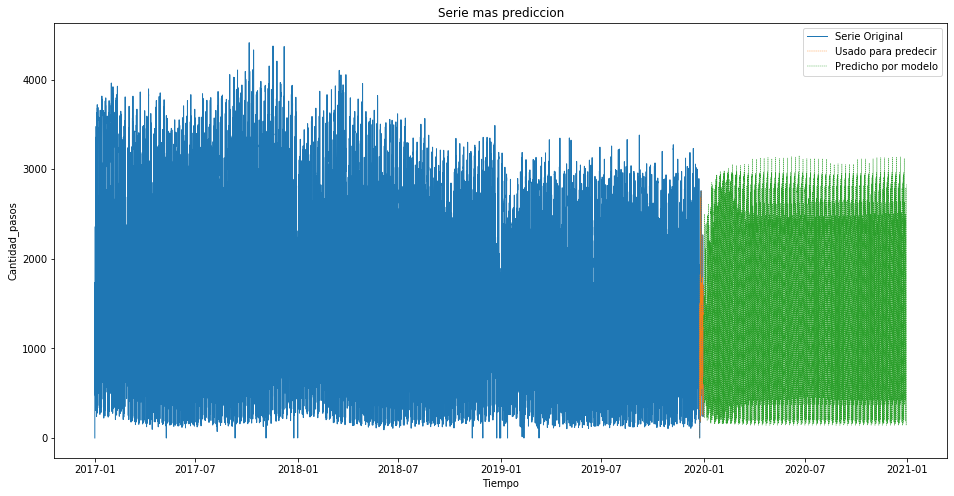

In [99]:
plt.figure(figsize=(16,8))
plt.title('Serie mas prediccion')
plt.plot(senial_2020.index[:N_train_2020+look_back], senial_2020[:N_train_2020+look_back],lw = 1, label = 'Serie Original')
plt.plot(senial_2020.index[N_train_2020:N_train_2020 + look_back], senial_2020[N_train_2020:N_train_2020 + look_back], '--', lw=0.4, alpha= .95, label = 'Usado para predecir')
plt.plot(senial_2020.index[N_train_2020+look_back+1: length_total_2020], y_test_pred_2020,'--', lw=0.4, label = 'Predicho por modelo')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad_pasos')
plt.show()

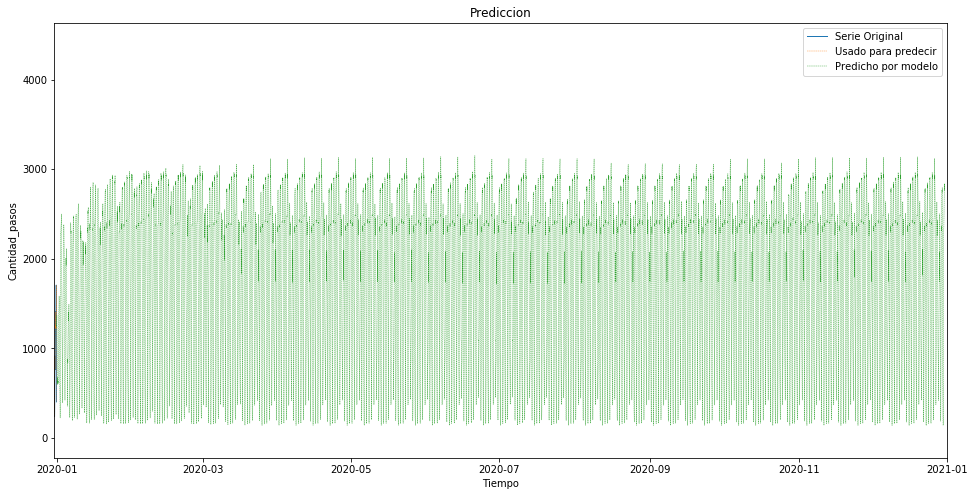

In [100]:
plt.figure(figsize=(16,8))
plt.title('Prediccion')
plt.plot(senial_2020.index[:N_train_2020+look_back], senial_2020[:N_train_2020+look_back],lw = 1, label = 'Serie Original')
plt.plot(senial_2020.index[N_train_2020:N_train_2020 + look_back], senial_2020[N_train_2020:N_train_2020 + look_back], '--', lw=0.4, alpha= .95, label = 'Usado para predecir')
plt.plot(senial_2020.index[N_train_2020+look_back+1: length_total_2020], y_test_pred_2020,'--', lw=0.4, label = 'Predicho por modelo')
plt.legend()
plt.xlim(737424,737791)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad_pasos')
plt.show()

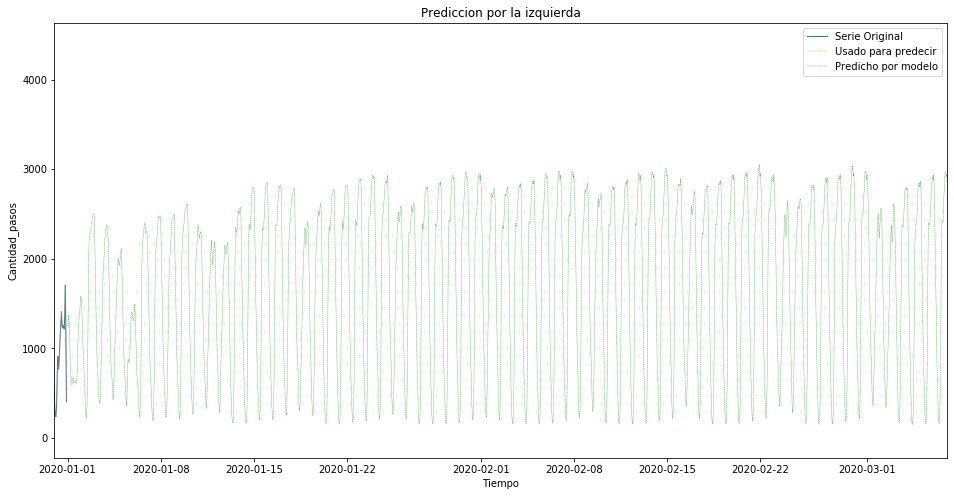

In [101]:
plt.figure(figsize=(16,8))
plt.title('Prediccion por la izquierda')
plt.plot(senial_2020.index[:N_train_2020+look_back], senial_2020[:N_train_2020+look_back],lw = 1, label = 'Serie Original')
plt.plot(senial_2020.index[N_train_2020:N_train_2020 + look_back], senial_2020[N_train_2020:N_train_2020 + look_back], '--', lw=0.4, alpha= .95, label = 'Usado para predecir')
plt.plot(senial_2020.index[N_train_2020+look_back+1: length_total_2020], y_test_pred_2020,'--', lw=0.4, label = 'Predicho por modelo')
plt.legend()
plt.xlim(737424,737491)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad_pasos')
plt.show()

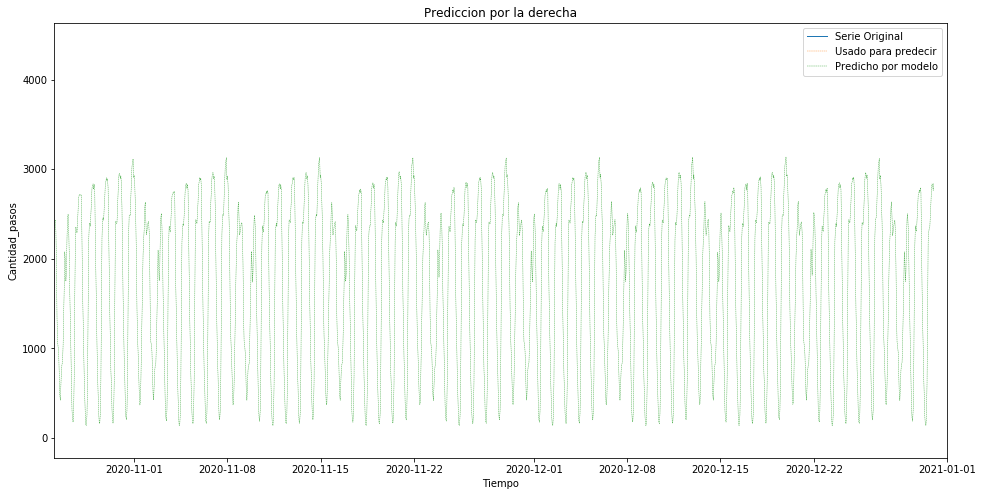

In [102]:
plt.figure(figsize=(16,8))
plt.title('Prediccion por la derecha')
plt.plot(senial_2020.index[:N_train_2020+look_back], senial_2020[:N_train_2020+look_back],lw = 1, label = 'Serie Original')
plt.plot(senial_2020.index[N_train_2020:N_train_2020 + look_back], senial_2020[N_train_2020:N_train_2020 + look_back], '--', lw=0.4, alpha= .95, label = 'Usado para predecir')
plt.plot(senial_2020.index[N_train_2020+look_back+1: length_total_2020], y_test_pred_2020,'--', lw=0.4, label = 'Predicho por modelo')
plt.legend()
plt.xlim(737724,737791)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad_pasos')
plt.show()

In [103]:
#winsound.Beep(freq, duration)

El modelo parece que predice descentemente, reproduce los componentes de 'season' semanales, perdio la tendencia.</br>
Me agrado como recupero al final de la serie el pico de los viernes.

#### Para concluir
1) La exploracion de los datos se debe de hacer con diferentes ventanas de tiempo, para tener diferentes puntos de vista de la informacion e ir generando hipotesis de que componentes tiene la serie.</br>
2) Hay herramientas diferentes a lo antes visto para analizar y comprender las series de tiempo. Incluso se pueden generar modelos a partir de ir sabiendo los componentes de la serie. </br>
3) La identificacion de datos extraños es similar a otros trabajos.</br>
4) En la preparacion  de la matriz de caracteristicas y el vector objetivo, se tiene que ser muy cuidadoso, ya sea para generar el modelo o para hacer las predicciones.</br>
5) Funcionan las clasicas herramientas de modelado de ML como regresion lineal, KNN(rapido en modelar, lento en predecir), arbol de decisiones , etc.

En retrospectiva, pude intentar otras cosas como: usar Prophet, TBATS, BATS, o incluso haber armado la matriz de caracteristicas de forma diferente teniendo solo features de importancia para tener mejores variables predictoras sin tener mucha carga de procesamiento.

De fbprophet esperaria obtener aparte de los componentes de la serie, poder probar diferentes tipos de tendencia('yhat_lower, yhat_upper) ver como se comportan con y sin dias festivos, y ver si incorpora los comportamientos diario semanal y mensual a la vez.

TBATS  y BATS, son librerias muy completas y los modelos que pueden crear incorporan estacionalidad(season) trigonometrica basada en series de Fourier, transformaciones Box-Cox, errores ARMA, y componentes de tendencia y estacionalidad(season).</br>
Ademas puede modelar años bisiestos sin problema.</br> Espero de este modelo que me muestre la estacionalidad (season) anual en las peredicciones, cosa que no se puede hacer con SARIMA, y tampoco el modelo que genere en esta notebook.</br> Lo malo de esta libreria, es que no esta optimizada para usar multiproceso, lo que la hace muy lenta de generar modelos.</br>
https://medium.com/intive-developers/forecasting-time-series-with-multiple-seasonalities-using-tbats-in-python-398a00ac0e8a

Y acerca de de como fue armada mi matriz de features, el objetivo de armala de diferente manera es tener un rango de datos mas amplio, solo con features de importancia, teniendo metricas de error semejantes, y sin perder eficacia en el calculo del modelo y de las predicciones.</br>
Recordando que mi modelo tiene predicciones cada hora, y se sabe que cada evento tiene autocorrelacion con el evento 24 horas antes, pero las corralaciones mas fuertes son con el evento una semana atras, no le ecuentro mucho sentido a concervar los datos no correlacionados con el vector, O dicho de otra maneara No tiene sentido calcular con features no importantes que solo que solo consumen procesamiento y espacio.</br>
Entonces podria utilizar una matriz reducida solo con features a 24 horas o incluso a una semana, con una busqueda hacia atras con 365 muestras o, 365x24; en vez de 365x24x7, para obtener una prediccion que tome valores con datos dentro de un año, en vez de que solo se usen solo unos dias o unas semanas.</br>
Y el otro objetivo es ver si asi me puede representar un prediccion no solo con la estacionalidad diaria y semanal, si no tambien la mensual. En fin tener un mejor modelado para periodos mas largo de prediccion que una semana, y sin perdida de rendimiento en el procesado.